In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate,ZGate
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer

In [3]:
def oracle_part(qc,qr):
    mcx = XGate().control(3)
    
    #Los qubits del 0 al 4 son los nodos.
    #Los qubits del 5 al 10 nos permiten reconocer si la arista es correcta
    #(i.e. si se da entre nodos de distinto color).
    qc.cx(qr[0], qr[5])
    qc.cx(qr[3], qr[5])
    qc.barrier()
    qc.cx(qr[0], qr[6])
    qc.cx(qr[4], qr[6])
    qc.barrier()
    qc.cx(qr[1], qr[7])
    qc.cx(qr[3], qr[7])
    qc.barrier()
    qc.cx(qr[1], qr[8])
    qc.cx(qr[4], qr[8])
    qc.barrier()
    qc.cx(qr[2], qr[9])
    qc.cx(qr[3], qr[9])
    qc.barrier()
    qc.cx(qr[2], qr[10])
    qc.cx(qr[4], qr[10])
    qc.barrier()
    
    
    #Los qubits del 11 al 15 nos van a permitir contar la cantidad de aristas correctas
    #de tal forma que la suma será expresada en binario con cifras dadas por q_11, q_10 y q_9.
    qc.barrier()    
    qc.cx(qr[5],qr[11])
    qc.barrier()
    
    qc.ccx(qr[6], qr[11], qr[12])
    qc.cx(qr[6],qr[11])
    qc.barrier()
    
    qc.ccx(qr[7], qr[11], qr[12])
    qc.cx(qr[7],qr[11])
    qc.barrier()
    
    qc.append(mcx,[8,11,12,13])
    qc.ccx(qr[8], qr[11], qr[12])
    qc.cx(qr[8],qr[11])
    qc.barrier()
    
    qc.append(mcx,[9,11,12,13])
    qc.ccx(qr[9], qr[11], qr[12])
    qc.cx(qr[9],qr[11])
    qc.barrier()

    qc.append(mcx,[10,11,12,13])
    qc.ccx(qr[10], qr[11], qr[12])
    qc.cx(qr[10],qr[11])
    qc.barrier()
    
    qc.x(qr[11])

    qc.barrier()
    
    #El qubit 12 indicará cuando se haya encontrado un estado deseado
    qc.append(mcx,[11,12,13,14])
    
    return qc

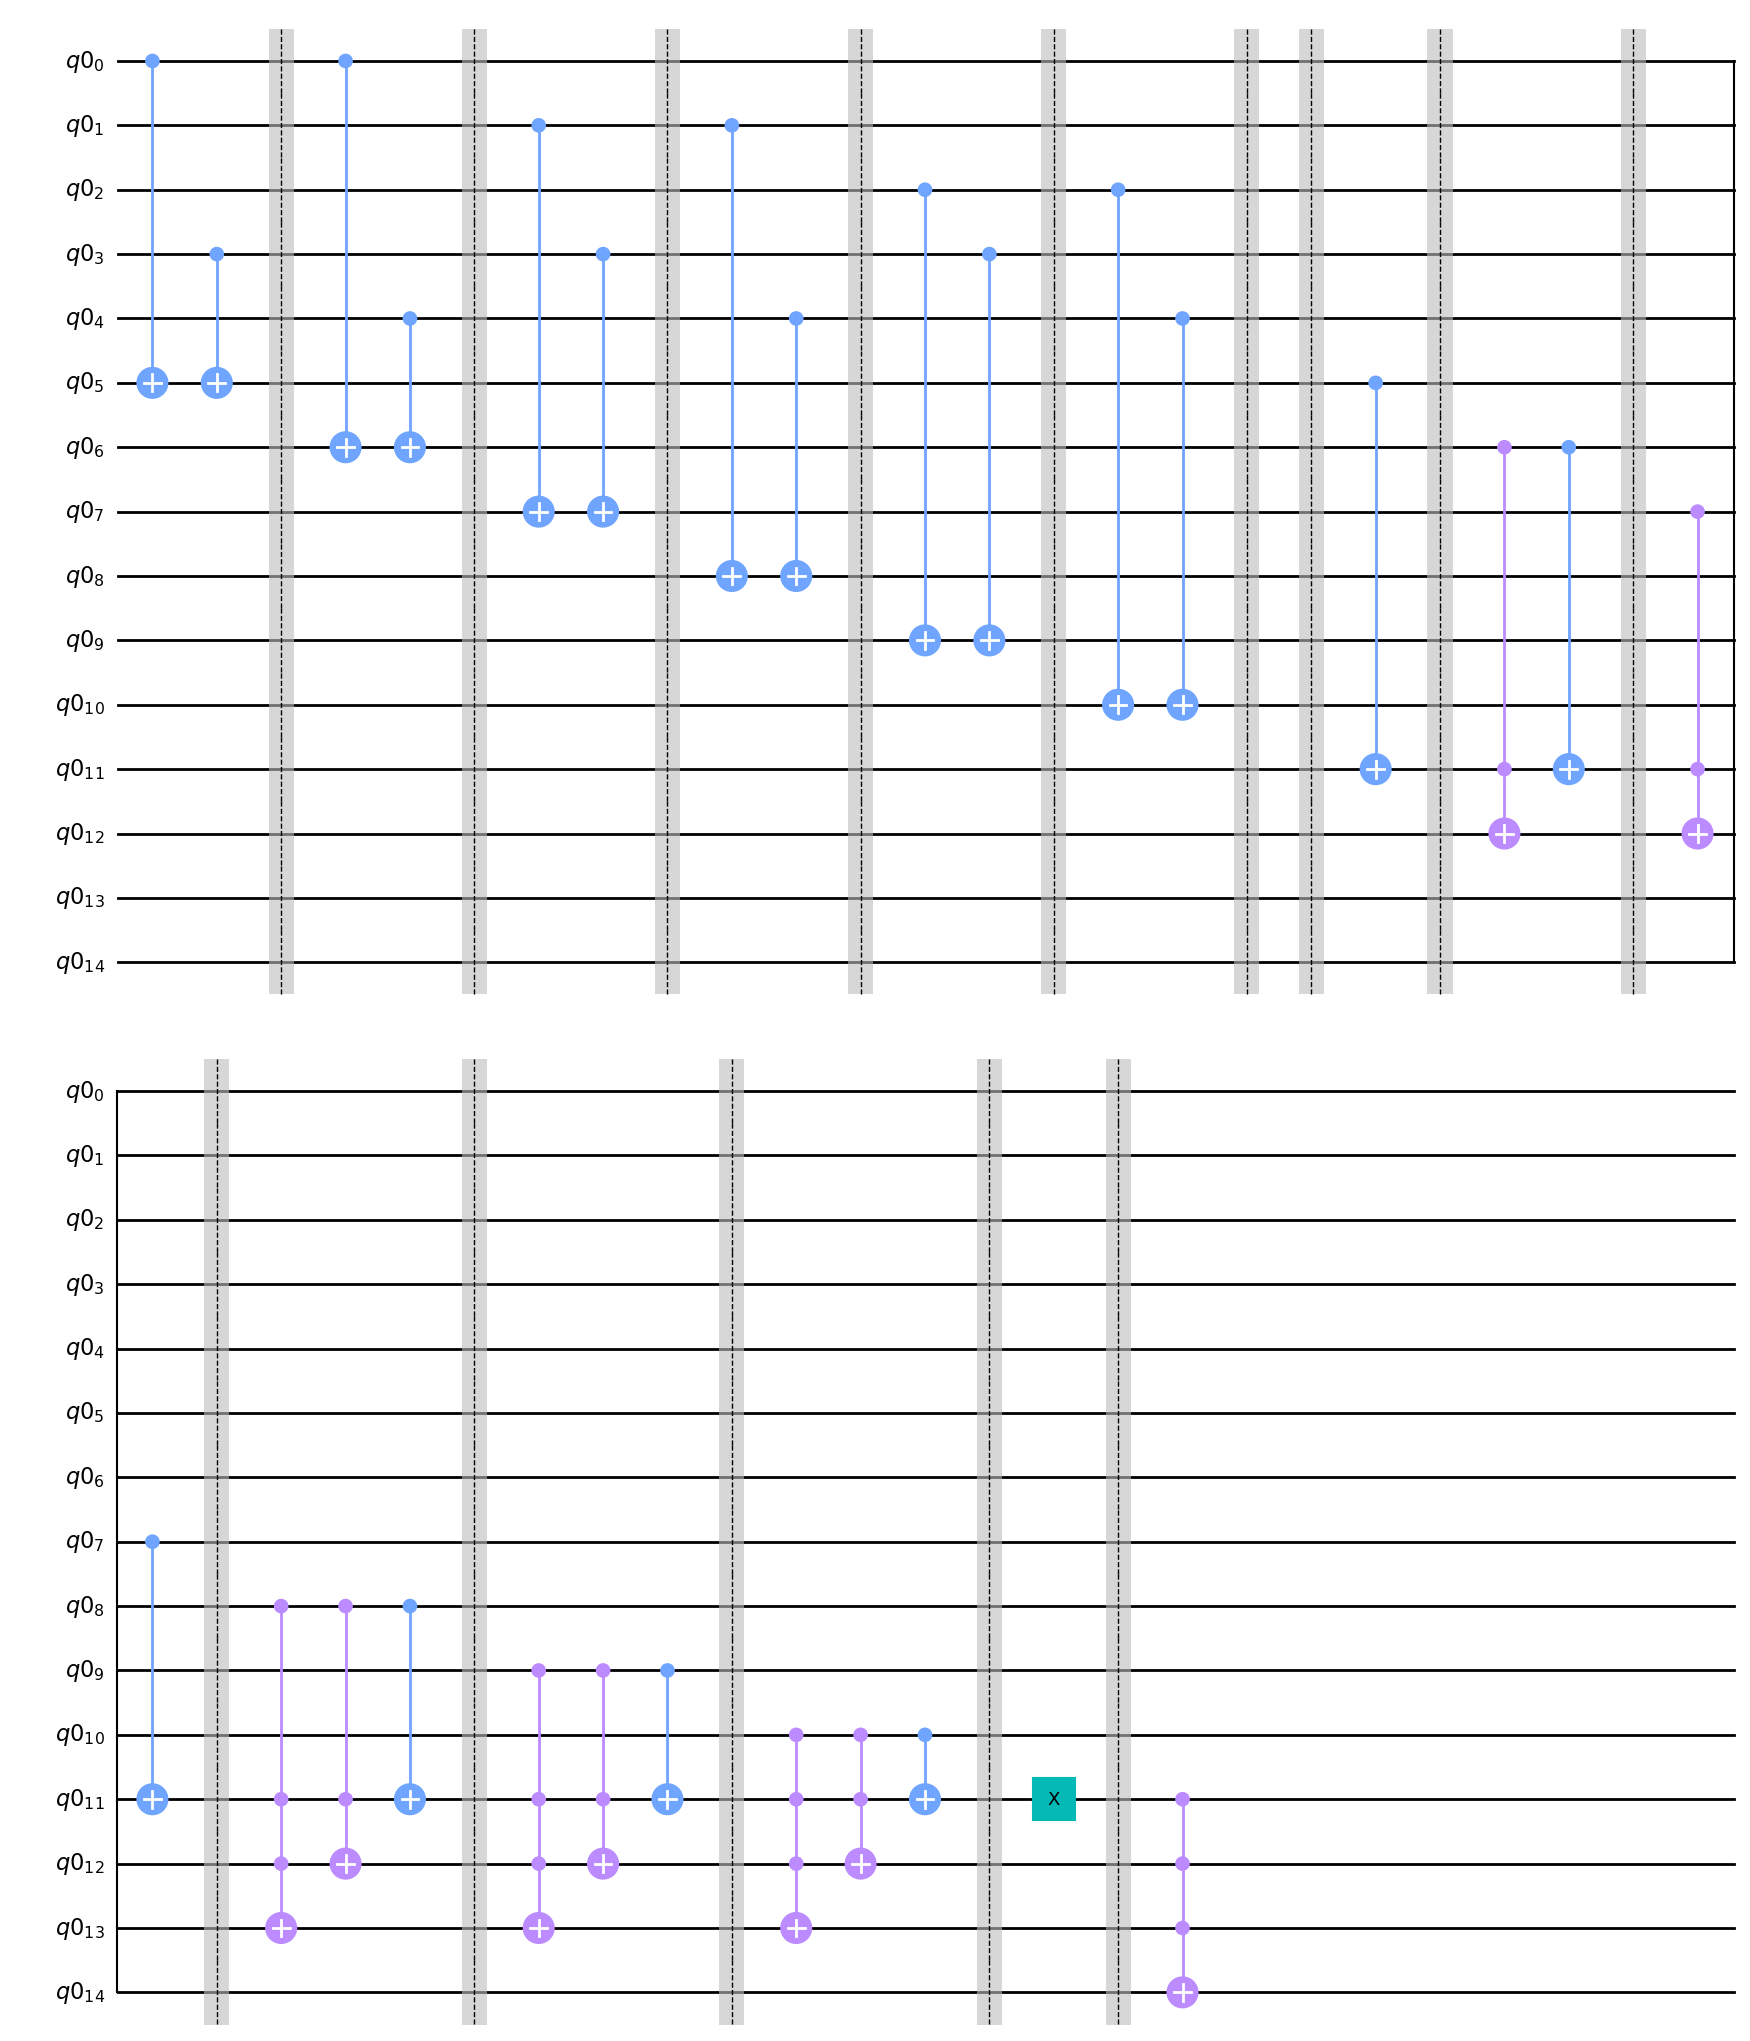

In [4]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
oracle_part(qc,qr).draw()

In [5]:
def oracle(qc,qr):
    
    qc=oracle_part(qc,qr)#Compone el circuito con el circuito inverso
    qc1=qc.inverse()
    qc.z(14)#efecto global (-) marcador del estado deseado
    qc.compose(qc1,inplace=True)
    
    return qc

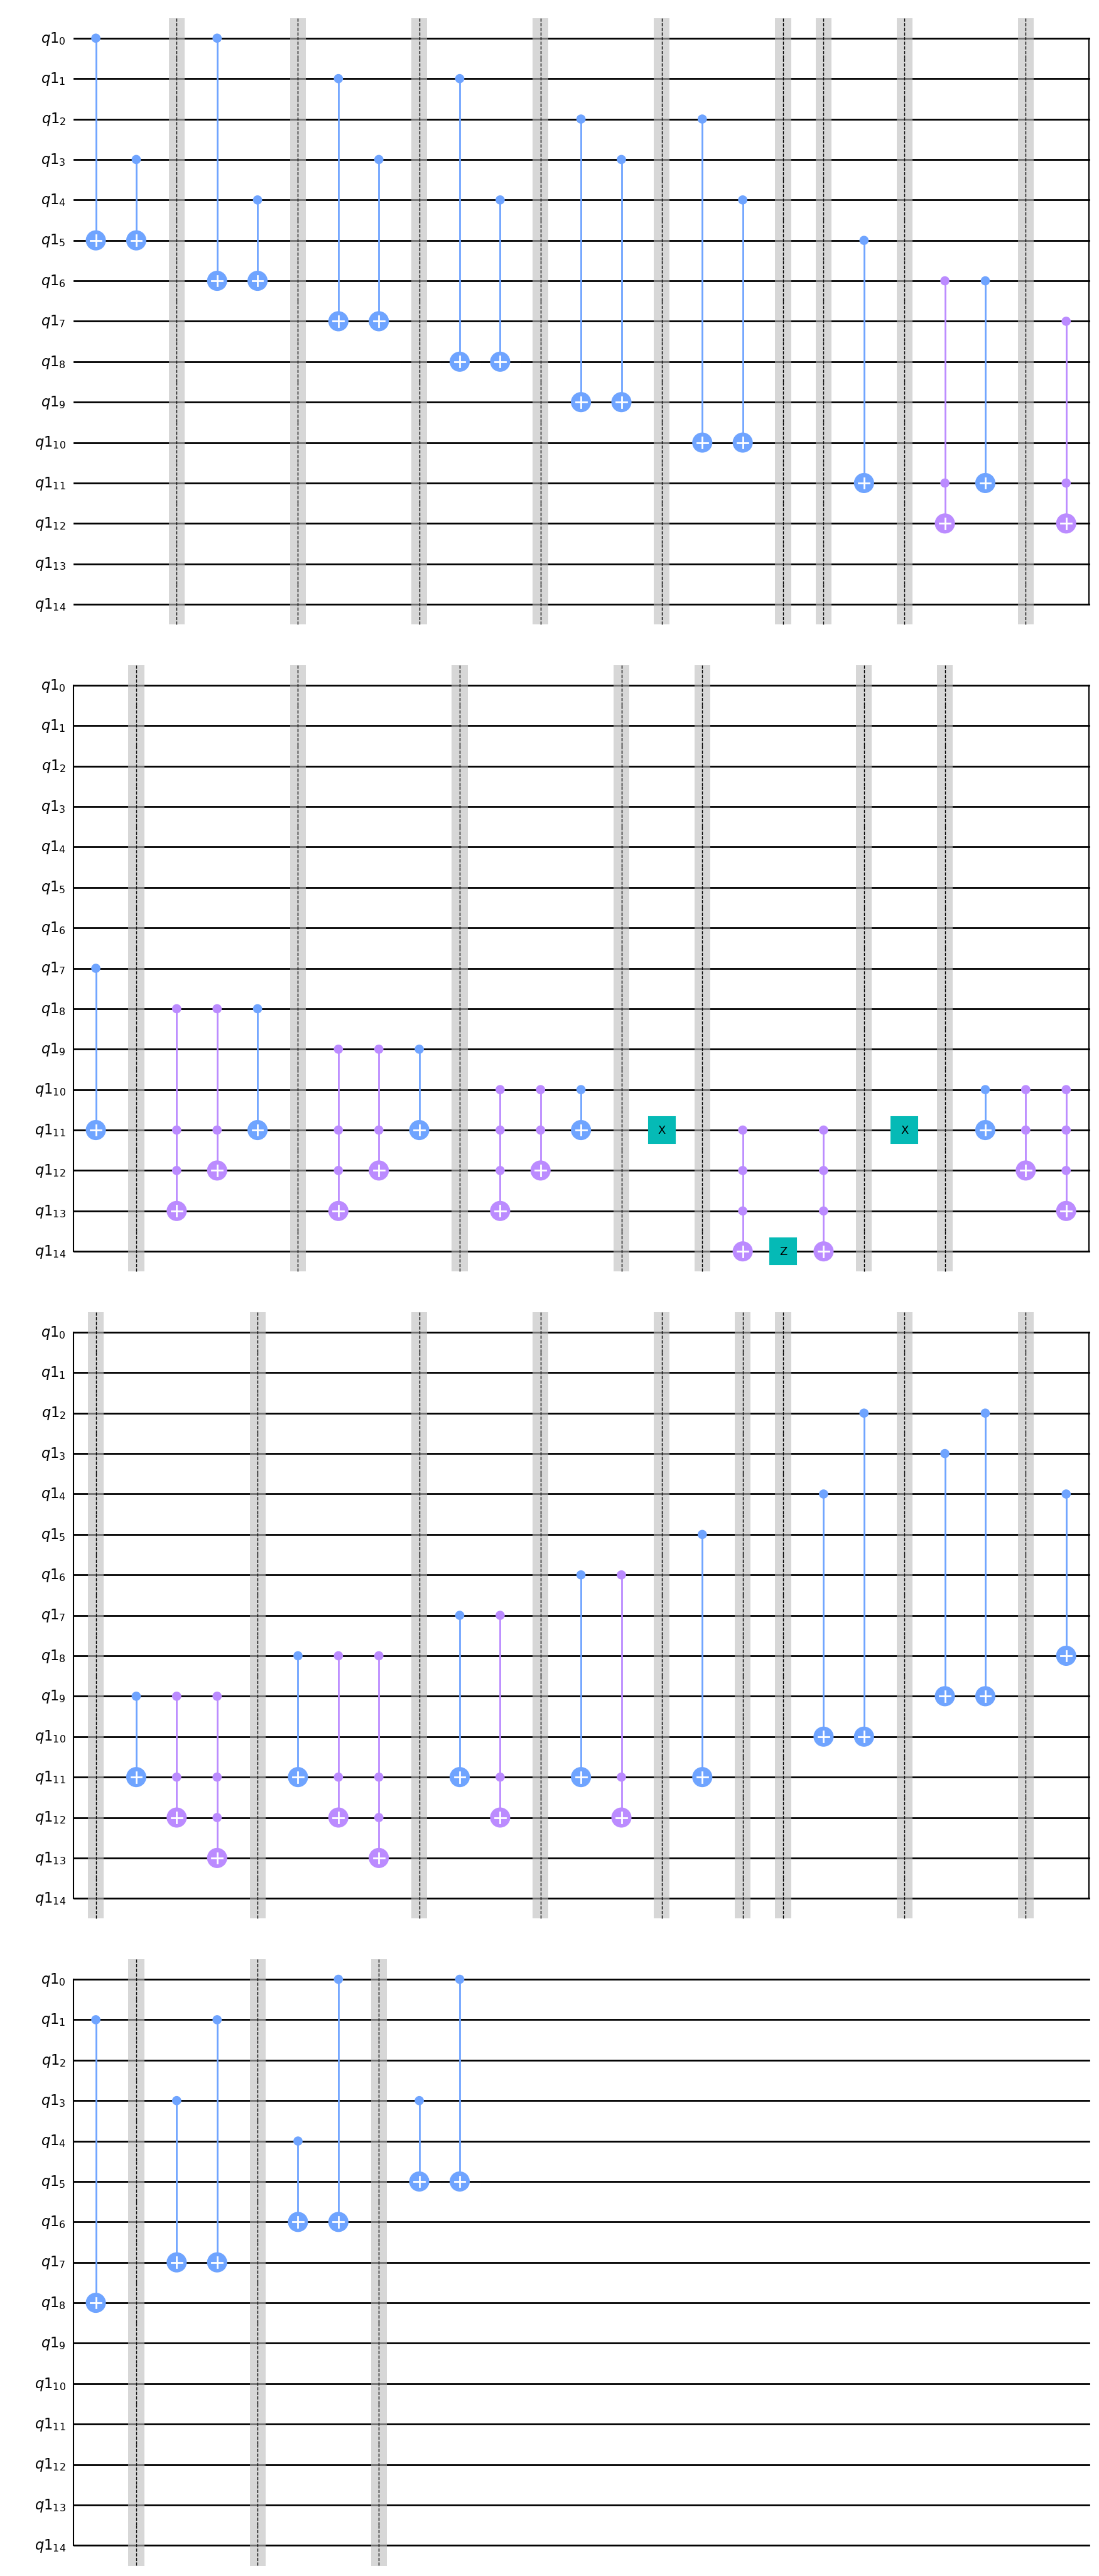

In [6]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
oracle(qc,qr).draw()

In [7]:
def grover_diffusion(qc,qr):
    mcz = ZGate().control(4)#   Cual es el significado
    
    qc.barrier()
    qc.h(range(5))
    qc.x(range(5))
    qc.append(mcz,list(range(0,5)))# Para que se usa
    qc.x(range(5))
    qc.h(range(5))
    qc.barrier()
    return qc

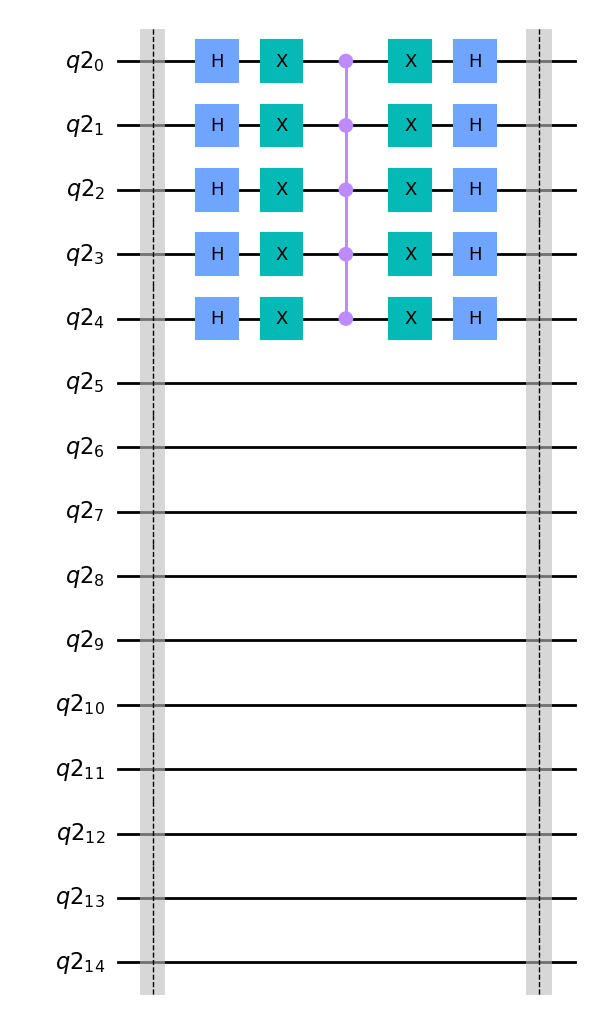

In [8]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
grover_diffusion(qc,qr).draw()

In [9]:
def grover(qc,qr):
    return grover_diffusion(oracle(qc,qr),qr)

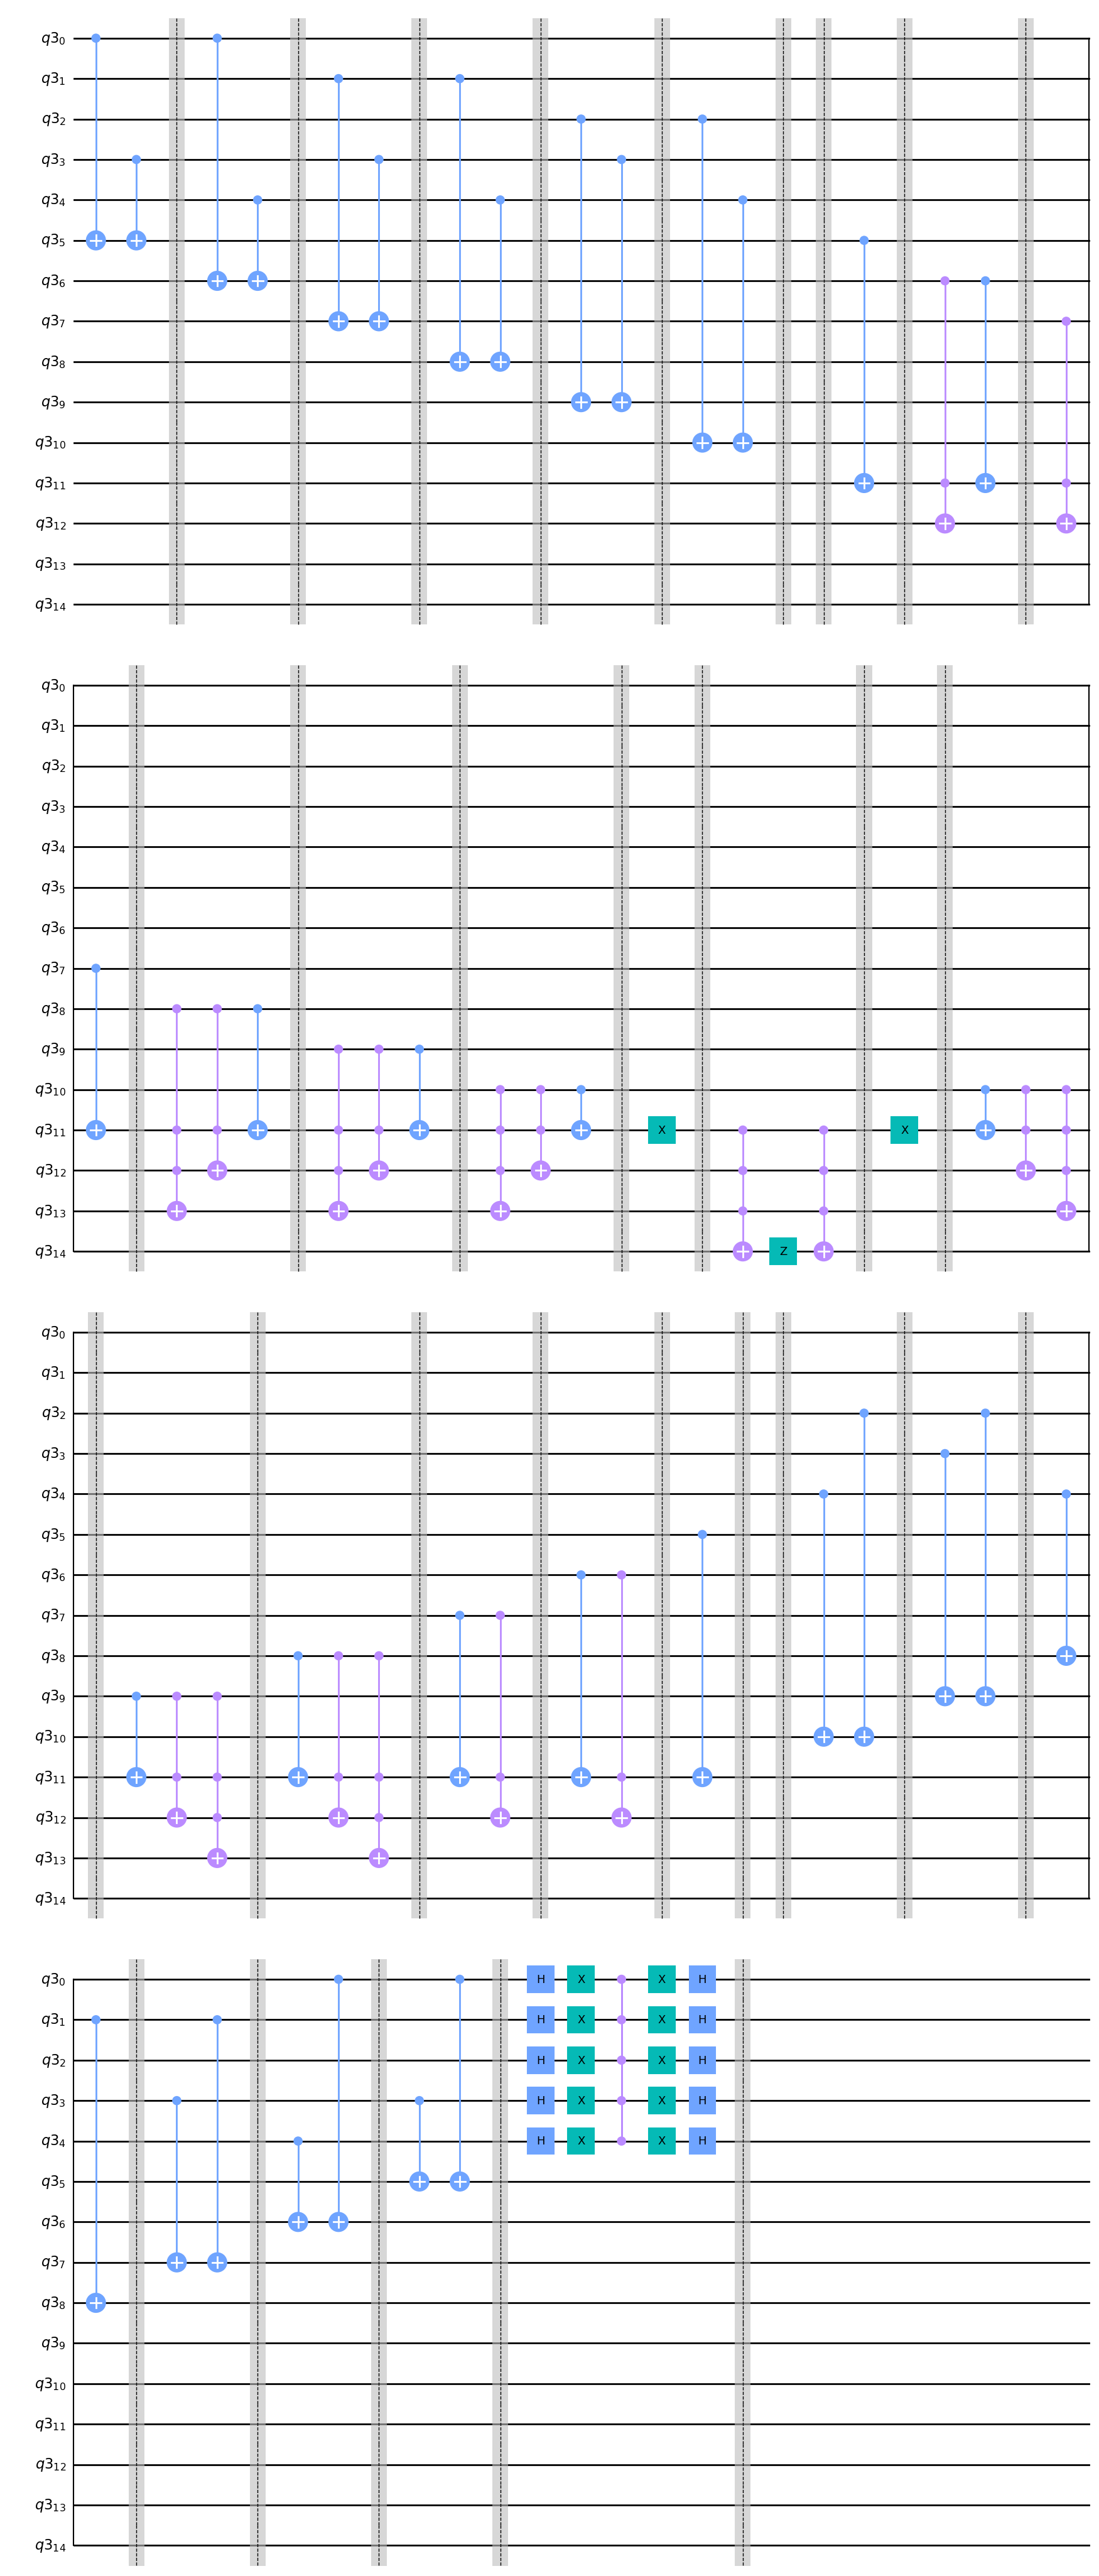

In [10]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
grover(qc,qr).draw()

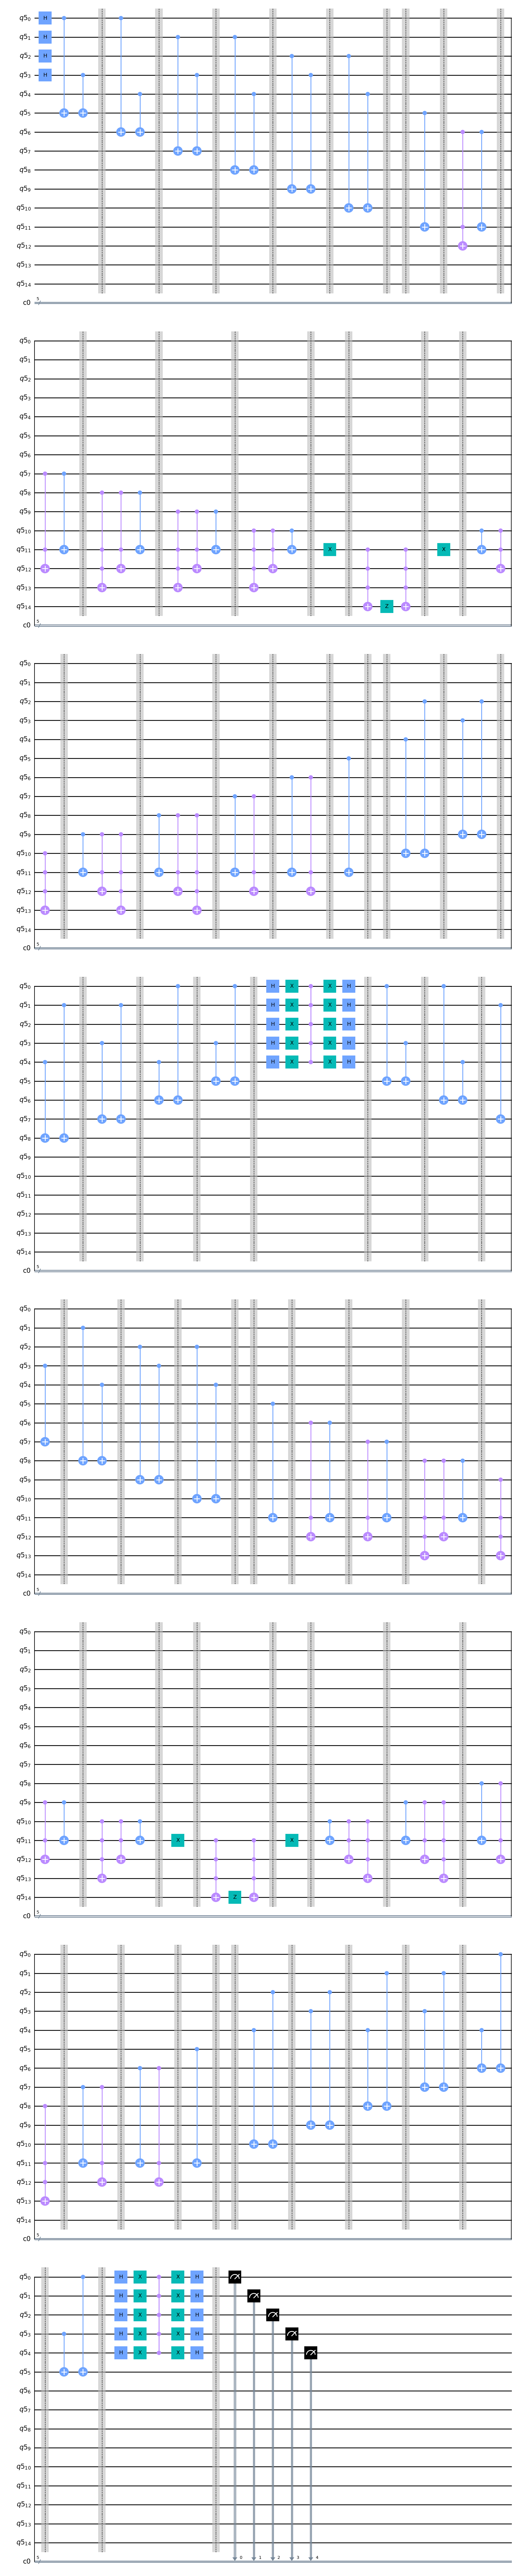

In [11]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)

qra=QuantumRegister(15)
cra=ClassicalRegister(5)
qa=QuantumCircuit(qra,cra)

qa.h(range(4))
qb=grover(qc,qr)
qa.compose(qb.compose(qb),inplace=True)

qa.measure(range(5),cra)

qa.draw()

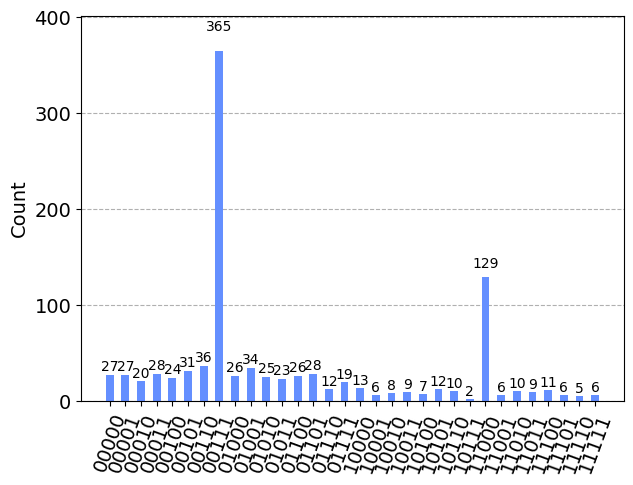

In [16]:
qasm_simulator = Aer.get_backend('qasm_simulator')

job = execute(qa, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qa)

plot_histogram(counts)